In [28]:
import matplotlib as mpl
mpl.rc('text', usetex=False)
mpl.rc('font', family='serif')
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', labelsize=20)
mpl.rc('axes', titlesize=20)
mpl.rc('figure', figsize=(6, 4))
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io as sio
from scipy.sparse import linalg

import firedrake as fd
import hydrogym as gym

/home/firedrake/firedrake/lib/python3.8/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/firedrake/firedrake/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


numpy.float64

In [35]:
flow = gym.flow.Cylinder(Re=50)
qB = flow.solve_steady()
solver = gym.ts.IPCS(flow, dt=1e-2)
A, B = solver.linearize(qB)  # Discrete time dynamics and control matrices

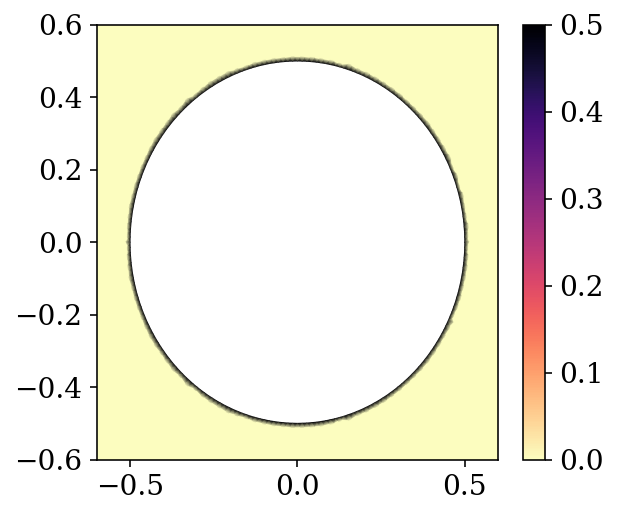

In [36]:
# Plot the control
B_fd = fd.Function(flow.mixed_space)
gym.utils.set_from_array(B_fd, B)

fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
Bu, Bp = B_fd.split()
im = fd.tripcolor(Bu, axes=ax, cmap='magma_r')
plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])
plt.colorbar(im)

In [37]:
# Runtime: ~34m
evals, evecs = linalg.eigs(A, k=6, tol=1e-6)

In [38]:
np.log(evals[0])/solver.dt

(0.02407629243163535-0.8597382045302958j)

In [39]:
evec_fd = fd.Function(flow.mixed_space)
gym.utils.set_from_array(evec_fd, np.real(evecs[:, 0]))

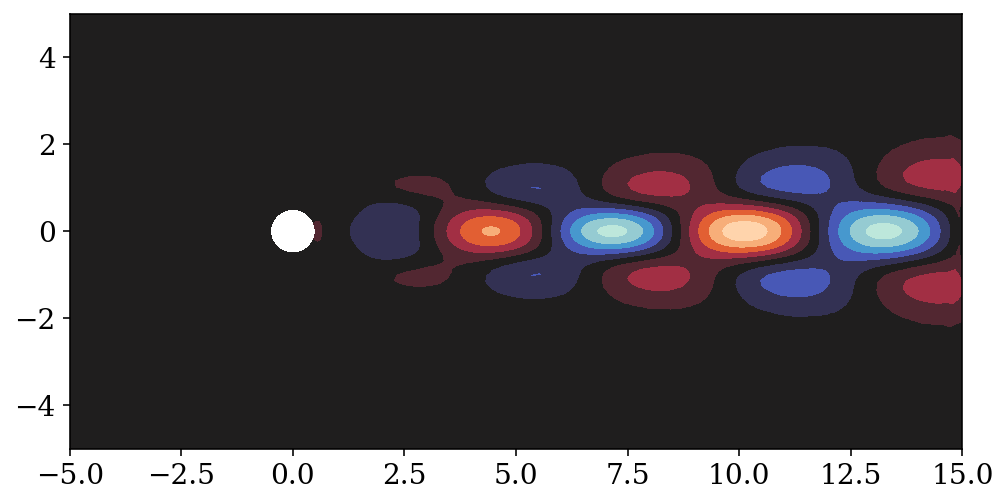

In [40]:
u1, p1 = evec_fd.split()
vort = fd.project(fd.curl(u1), flow.pressure_space)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
levels = np.linspace(-0.02, 0.02, 10)
fd.tricontourf(vort, axes=ax, levels=levels, extend='both', 
               cmap=sns.color_palette("icefire", as_cmap=True))
plt.show()

In [ ]:
# Adjoint stability
# Test dot(B, evecH)
# Projection
# Controllability

### OLD

In [27]:
sys = sio.loadmat('../output/lti.mat')

In [31]:
flow = gym.flow.Cylinder(h5_file='../output/checkpoint.h5')

flow.load_checkpoint('../output/checkpoint.h5')  # Reload previous solution
vort = flow.vorticity()

/home/firedrake/firedrake/lib/python3.8/site-packages/matplotlib_inline/config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


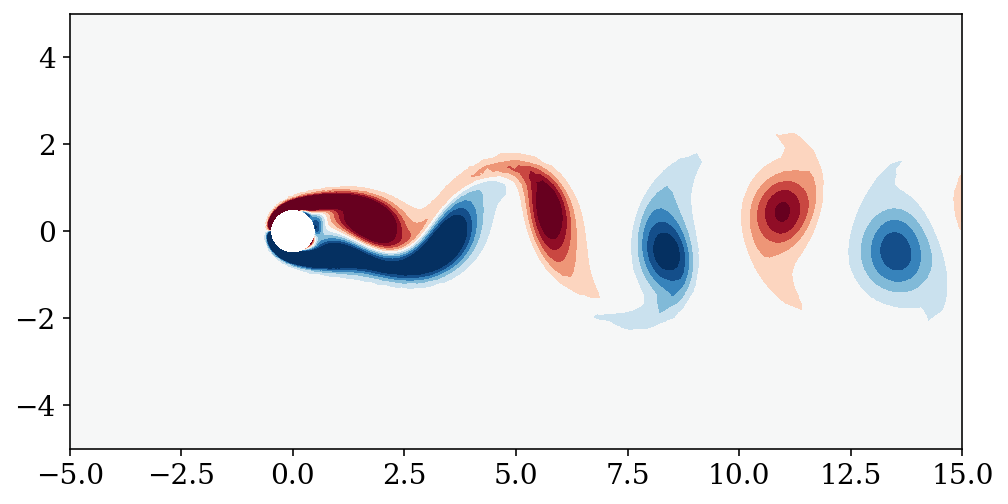

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
levels = np.linspace(-1.5, 1.5, 10)
fd.tricontourf(vort, axes=ax, levels=levels, cmap='RdBu', extend='both')
plt.show()

In [10]:
flow = gym.flow.Cylinder()
B_func = fd.Function(flow.mixed_space)
gym.utils.set_from_array(B_func, sys['B'][:, 0])

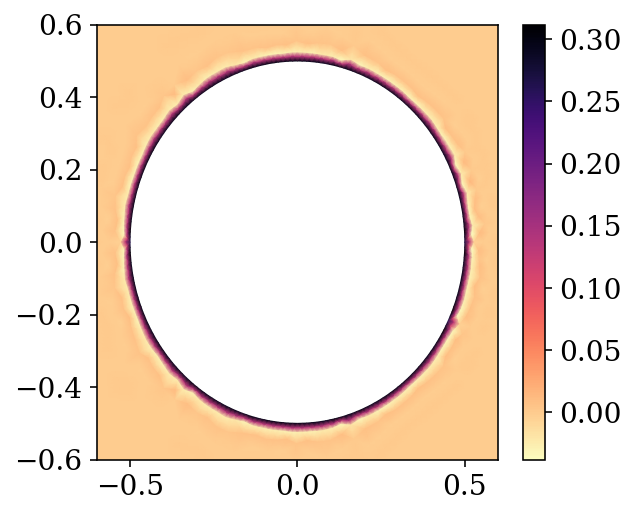

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
B_plt = fd.project(fd.sqrt(B_func.sub(0).sub(0)**2 + B_func.sub(0).sub(1)**2), flow.pressure_space)
im = fd.tripcolor(B_plt, axes=ax, cmap='magma_r')
plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])
plt.colorbar(im)

In [8]:
sys['B'][:, 0].shape

(78236,)